In [ ]:
!pip install torchsummary

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchsummary import summary

%matplotlib inline

In [ ]:
from google.colab import files

# Загрузка kaggle.json
uploaded = files.upload()

# Перемещение токена в нужную директорию
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q kaggle

# Проверка установки
!kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                      Netflix Movies and TV Shows                       1MB  2025-01-03 10:33:01           1885         47  1.0              
ankushpanday1/heart-attack-in-youth-vs-adult-in-germany        Heart Attack in Youth Vs Adult in Germany         6MB  2025-01-08 14:33:17           1059         30  1.0              
stealthtechnologies/predict-student-performance-dataset        Predict Student Performance                      12KB  2024-12-26 12:57:04           3082         75  1.0              
taweilo/wine-quality-dataset-balanced-classification           Wine Quality dataset -

In [ ]:

import kagglehub

path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:40<00:00, 71.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:
import os

print("Файлы в датасете:")
for file_name in os.listdir(path):
    print(file_name)

Файлы в датасете:
test
new plant diseases dataset(augmented)
New Plant Diseases Dataset(Augmented)


In [ ]:

main_dir = os.path.join(path, "New Plant Diseases Dataset(Augmented)")
print("Содержимое папки:", os.listdir(main_dir))


Содержимое папки: ['New Plant Diseases Dataset(Augmented)']


In [ ]:
test_dir = os.path.join(path, "test")
print("Содержимое тестовой папки:", os.listdir(test_dir))


Содержимое тестовой папки: ['test']


In [ ]:
main_dir = os.path.join(path, "New Plant Diseases Dataset(Augmented)")
if os.path.exists(main_dir):
    print("Содержимое папки New Plant Diseases Dataset(Augmented):", os.listdir(main_dir))

    nested_dir = os.path.join(main_dir, "New Plant Diseases Dataset(Augmented)")
    if os.path.exists(nested_dir):
        print("Содержимое вложенной папки:", os.listdir(nested_dir))

        train_dir = os.path.join(nested_dir, "train")
        valid_dir = os.path.join(nested_dir, "valid")

        if os.path.exists(train_dir) and os.path.exists(valid_dir):
            diseases = os.listdir(train_dir)
            print("Классы болезней:", diseases)
            print("Количество классов: {}".format(len(diseases)))

Содержимое папки New Plant Diseases Dataset(Augmented): ['New Plant Diseases Dataset(Augmented)']
Содержимое вложенной папки: ['train', 'valid']
Классы болезней: ['Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Bacterial_spot', 'Blueberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Pepper,_bell___healthy', 'Apple___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Raspberry___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Peach___Bacterial_spot', 'Grape___healthy', 'Strawberry___healthy', 'Potato___healthy', 'Apple___Apple_scab', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Squash___Powdery_mildew', 'Corn_(maize)___healthy', 'Apple___Black_rot', 'Soybe

In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
print(f"Растения в датасете: \n{plants}")

Растения в датасете: 
['Tomato', 'Corn_(maize)', 'Blueberry', 'Pepper,_bell', 'Apple', 'Raspberry', 'Orange', 'Cherry_(including_sour)', 'Peach', 'Grape', 'Strawberry', 'Potato', 'Squash', 'Soybean']


In [ ]:
print("Количество растений в датасете: {}".format(len(plants)))

Количество растений в датасете: 14


In [ ]:
print("Кол-во болезней: {}".format(NumberOfDiseases))

Кол-во болезней: 26


Итак, у нас есть изображения листьев 14 растений, и, исключив здоровые листья, мы получили 26 типов изображений, которые показывают конкретное заболевание конкретного растения.

In [ ]:
# Количество изображений для каждого заболевания
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

# Преобразование словаря nums в кадр данных pandas, передавая индекс как название растения, а количество изображений как столбец

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class


no. of images
Tomato___Tomato_mosaic_virus                                 1790
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Tomato___Bacterial_spot                                      1702
Blueberry___healthy                                          1816
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Pepper,_bell___healthy                                       1988
Apple___healthy                                              2008
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Septoria_leaf_spot                                  1745
Pepper,_bell___Bacterial_spot                                1913
Raspberry___healthy                                          1781
Tomato___Early_blight                                        1920
Corn_(maize)___Common_rust_                                  1907
Orange___Haunglongbing_(Citrus_greening)                     2010
Apple___Cedar_apple_rust                                     1760
Cherry_(including_sour)___Powdery_mildew                     1683
Cherry_(including_sour)___healthy                            1826
Peach___Bacterial_spot                                       1838
Grape___healthy                                              1692
Strawberry___healthy                                         1824
Potato___healthy                                             1824
Apple___Apple_scab                                           2016
Grape___Esca_(Black_Measles)                                 1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Squash___Powdery_mildew                                      1736
Corn_(maize)___healthy                                       1859
Apple___Black_rot                                            1987
Soybean___healthy                                            2022
Tomato___Leaf_Mold                                           1882
Tomato___Late_blight                                         1851
Strawberry___Leaf_scorch                                     1774
Corn_(maize)___Northern_Leaf_Blight                          1908
Grape___Black_rot                                            1888
Potato___Early_blight                                        1939
Potato___Late_blight                                         1939
Tomato___healthy                                             1926
Tomato___Target_Spot                                         1827
Peach___healthy                                              1728

Визуализация приведенной выше информации на графике

Text(0.5, 1.0, 'Изображения для каждого класса болезней растений')

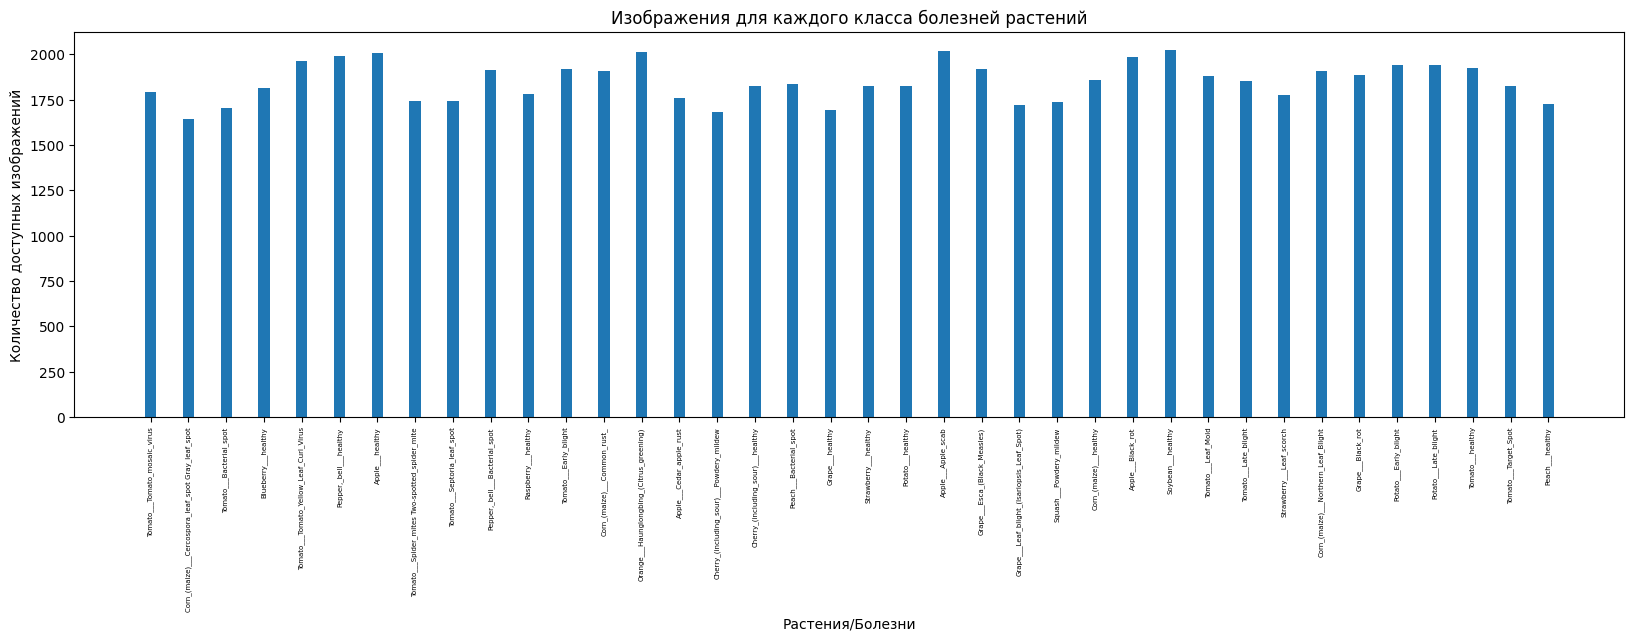

In [ ]:
# график количества доступных изображений для каждого заболевания
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Растения/Болезни', fontsize=10)
plt.ylabel('Количество доступных изображений', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Изображения для каждого класса болезней растений')

Мы видим, что набор данных почти сбалансирован для всех классов.

In [ ]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"Для обучения имеется {n_train} изображений")

Для обучения имеется 70295 изображений


In [ ]:
import os

# Путь к тестовой папке
test_images_dir = os.path.join(test_dir, "test")  # Если изображения в "test/test"
if not os.path.exists(test_images_dir):
    test_images_dir = test_dir  # Если изображения непосредственно в "test"

# Получение всех файлов изображений
all_images = os.listdir(test_images_dir)

# Фильтрация только изображений (например, .jpg, .png)
image_extensions = {".jpg", ".jpeg", ".png"}
test_images = [img for img in all_images if os.path.splitext(img)[1].lower() in image_extensions]

# Взять первые 50 изображений
selected_images = test_images[:50]

print(f"Выбрано {len(selected_images)} изображений для тестирования.")
print(selected_images)


Выбрано 33 изображений для тестирования.
['TomatoYellowCurlVirus6.JPG', 'PotatoEarlyBlight3.JPG', 'TomatoYellowCurlVirus3.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight2.JPG', 'PotatoEarlyBlight2.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoHealthy4.JPG', 'AppleScab1.JPG', 'CornCommonRust1.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG', 'TomatoHealthy1.JPG', 'TomatoHealthy2.JPG', 'TomatoHealthy3.JPG', 'PotatoEarlyBlight4.JPG', 'CornCommonRust2.JPG', 'TomatoYellowCurlVirus2.JPG', 'PotatoEarlyBlight1.JPG', 'AppleCedarRust2.JPG', 'PotatoEarlyBlight5.JPG', 'TomatoYellowCurlVirus5.JPG', 'CornCommonRust3.JPG', 'AppleScab3.JPG', 'AppleCedarRust1.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoEarlyBlight5.JPG', 'AppleCedarRust3.JPG', 'TomatoEarlyBlight4.JPG', 'AppleScab2.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoYellowCurlVirus4.JPG', 'AppleCedarRust4.JPG']


In [ ]:
import shutil

# Папка для сохранения выбранных изображений
output_dir = "selected_test_images"
os.makedirs(output_dir, exist_ok=True)

# Копирование файлов
for img in selected_images:
    shutil.copy(os.path.join(test_images_dir, img), os.path.join(output_dir, img))

print(f"Изображения скопированы в папку: {output_dir}")


Изображения скопированы в папку: selected_test_images


## Подготовка данных для обучения

In [ ]:
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

In [ ]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [ ]:
len(train.classes)

38

In [ ]:
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


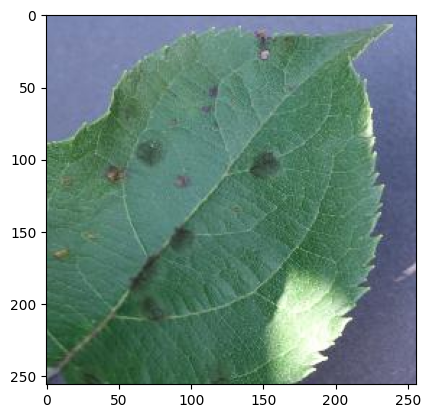

In [ ]:
show_image(*train[5])

Label :Apple___Apple_scab(0)


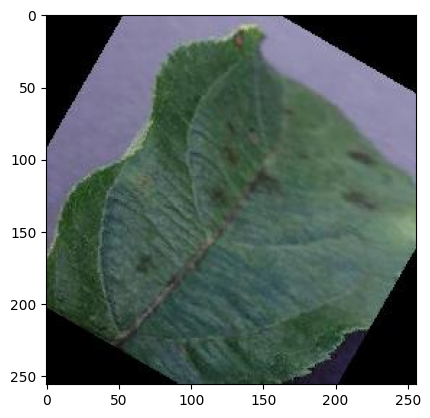

In [ ]:
show_image(*train[12])

Label :Pepper,_bell___Bacterial_spot(18)


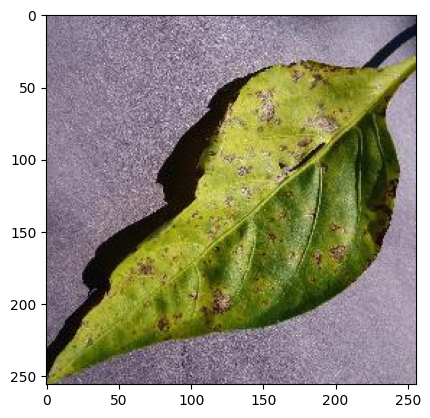

In [ ]:
show_image(*train[35000])


In [ ]:
random_seed = 7
torch.manual_seed(random_seed)

batch_size = 32

train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [ ]:
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

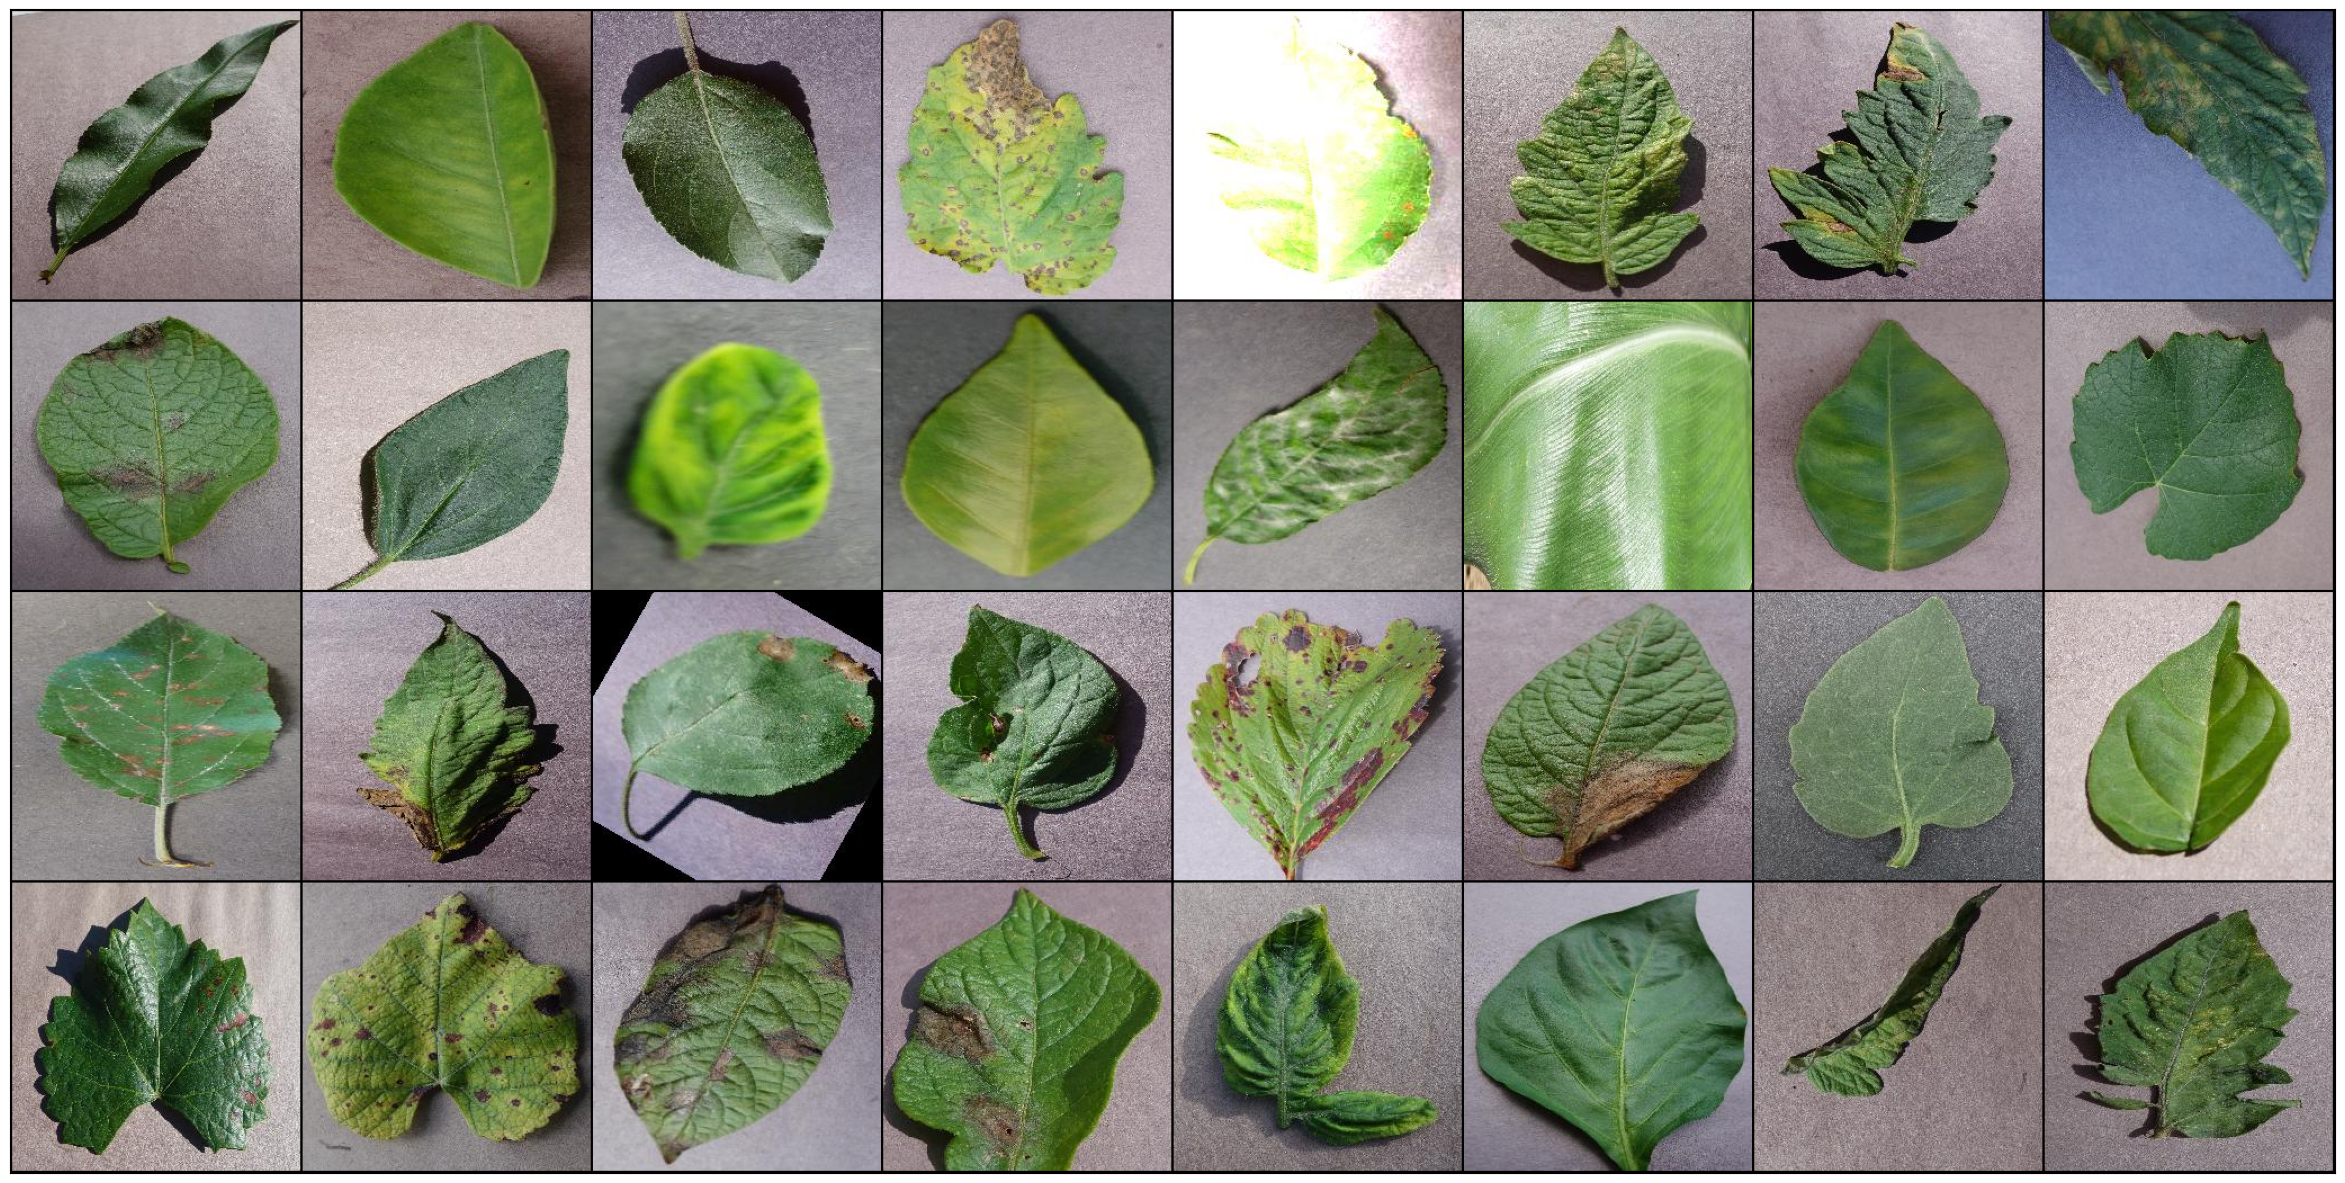

In [ ]:
show_batch(train_dl)

In [ ]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Построение архитектуры модели

In [ ]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x

In [ ]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

In [ ]:
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()

        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))

        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))

    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
import torch

print(torch.cuda.is_available())

True


In [ ]:
!pip install torch torchvision torchaudio

In [ ]:

model = to_device(ResNet9(3, len(train.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cuda(), (INPUT_SHAPE)))
# print(summary(model, (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

## Обучение модели

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))


    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()


        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
%%time

history = [evaluate(model, valid_dl)]
history

CPU times: user 58.7 s, sys: 5.7 s, total: 1min 4s
Wall time: 1min 12s


[{'val_loss': tensor(3.6378, device='cuda:0'), 'val_accuracy': tensor(0.0282)}]

In [ ]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time

history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl,
                             grad_clip=grad_clip,
                             weight_decay=1e-4,
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00812, train_loss: 0.7574, val_loss: 0.5515, val_acc: 0.8364
Epoch [1], last_lr: 0.00000, train_loss: 0.1251, val_loss: 0.0274, val_acc: 0.9916
CPU times: user 14min 47s, sys: 17min 32s, total: 32min 19s
Wall time: 33min 11s


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

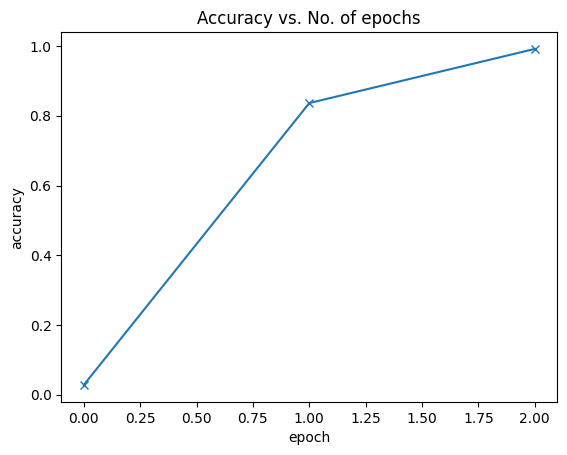

In [ ]:
plot_accuracies(history)

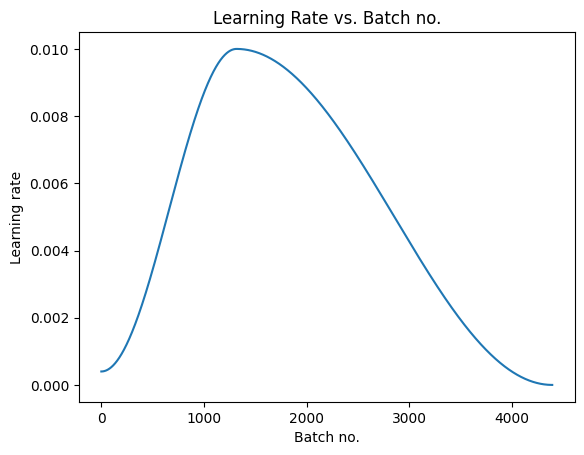

In [ ]:
plot_lrs(history)

## Тестирование модели на тестовых данных

In [ ]:
test_dir = os.path.join(path, "test")
if os.path.exists(test_dir):

    test = ImageFolder(test_dir, transform=transforms.ToTensor())

test_dir = os.path.join(test_dir, 'test')
if os.path.exists(test_dir):
    print("Содержимое папки test:", os.listdir(test_dir))

    test_images = sorted(os.listdir(test_dir))
    print("Тестовые изображения (первые 10):", test_images[:10])


Содержимое папки test: ['CornCommonRust1.JPG', 'PotatoEarlyBlight3.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoEarlyBlight5.JPG', 'TomatoYellowCurlVirus6.JPG', 'PotatoHealthy1.JPG', 'PotatoEarlyBlight2.JPG', 'CornCommonRust3.JPG', 'PotatoHealthy2.JPG', 'AppleCedarRust2.JPG', 'AppleScab3.JPG', 'PotatoEarlyBlight1.JPG', 'TomatoHealthy3.JPG', 'TomatoEarlyBlight4.JPG', 'AppleCedarRust3.JPG', 'PotatoEarlyBlight4.JPG', 'TomatoYellowCurlVirus3.JPG', 'AppleCedarRust1.JPG', 'TomatoHealthy4.JPG', 'TomatoYellowCurlVirus5.JPG', 'TomatoHealthy1.JPG', 'TomatoYellowCurlVirus2.JPG', 'TomatoYellowCurlVirus4.JPG', 'TomatoEarlyBlight2.JPG', 'TomatoYellowCurlVirus1.JPG', 'CornCommonRust2.JPG', 'AppleScab1.JPG', 'AppleCedarRust4.JPG', 'PotatoEarlyBlight5.JPG', 'TomatoHealthy2.JPG', 'AppleScab2.JPG']
Тестовые изображения (первые 10): ['AppleCedarRust1.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust3.JPG', 'AppleCedarRust4.JPG', 'AppleScab1.JPG', 'AppleScab2.JPG', 

In [ ]:
# Путь к папке test
test_dir = os.path.join(path, "test")

if os.path.exists(test_dir):
    print("Содержимое папки test:", os.listdir(test_dir))
    for item in os.listdir(test_dir):
        item_path = os.path.join(test_dir, item)
        if os.path.isdir(item_path):
            print(f"Папка {item} содержит:", os.listdir(item_path))
else:
    print("Папка test не найдена:", test_dir)



Содержимое папки test: ['test']
Папка test содержит: ['TomatoYellowCurlVirus6.JPG', 'PotatoEarlyBlight3.JPG', 'TomatoYellowCurlVirus3.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight2.JPG', 'PotatoEarlyBlight2.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoHealthy4.JPG', 'AppleScab1.JPG', 'CornCommonRust1.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG', 'TomatoHealthy1.JPG', 'TomatoHealthy2.JPG', 'TomatoHealthy3.JPG', 'PotatoEarlyBlight4.JPG', 'CornCommonRust2.JPG', 'TomatoYellowCurlVirus2.JPG', 'PotatoEarlyBlight1.JPG', 'AppleCedarRust2.JPG', 'PotatoEarlyBlight5.JPG', 'TomatoYellowCurlVirus5.JPG', 'CornCommonRust3.JPG', 'AppleScab3.JPG', 'AppleCedarRust1.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoEarlyBlight5.JPG', 'AppleCedarRust3.JPG', 'TomatoEarlyBlight4.JPG', 'AppleScab2.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoYellowCurlVirus4.JPG', 'AppleCedarRust4.JPG']


In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)

    return train.classes[preds[0].item()]

Label: AppleCedarRust1.JPG , Predicted: Tomato___Early_blight


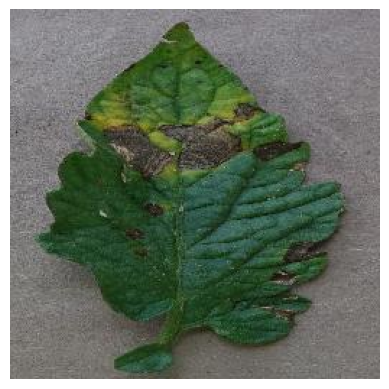

In [ ]:
img, label = test[20]
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')  # Убираем оси
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))
plt.show()  # Отображаем изображение

In [ ]:
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight
Label: PotatoHealthy1.JPG , Predicted: Potato___h

## Сохранение

In [ ]:
model.eval()  # Убедитесь, что модель в режиме оценки

# Создайте TorchScript-модель
scripted_model = torch.jit.script(model)  # Или torch.jit.trace(model, example_input)
scripted_model.save("model2.pth")

In [ ]:
# Сохранение только весов модели
torch.save(model.state_dict(), "model_weights.pth")

# Или сохранение всей модели
torch.save(model, "model_full.pth")


In [ ]:
import torch
import torchvision
print(torch.__version__)  # Версия PyTorch
print(torchvision.__version__)  # Версия torchvision

2.5.1+cu121
0.20.1+cu121
